<a href="https://colab.research.google.com/github/Borwec/mmsp_25_26/blob/main/lab3/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt

# Завдання з аналізу МП
Мережа Петрі задана 5 позиціями та 5 переходами з початковою розміткою $ μ=(0;0;1;0;0) $ (нумерація позицій відбувалася зліва направо). В даному випадку кількість можливих розміток є необмеженою, тому буде побудовано 50 випадкових розміток

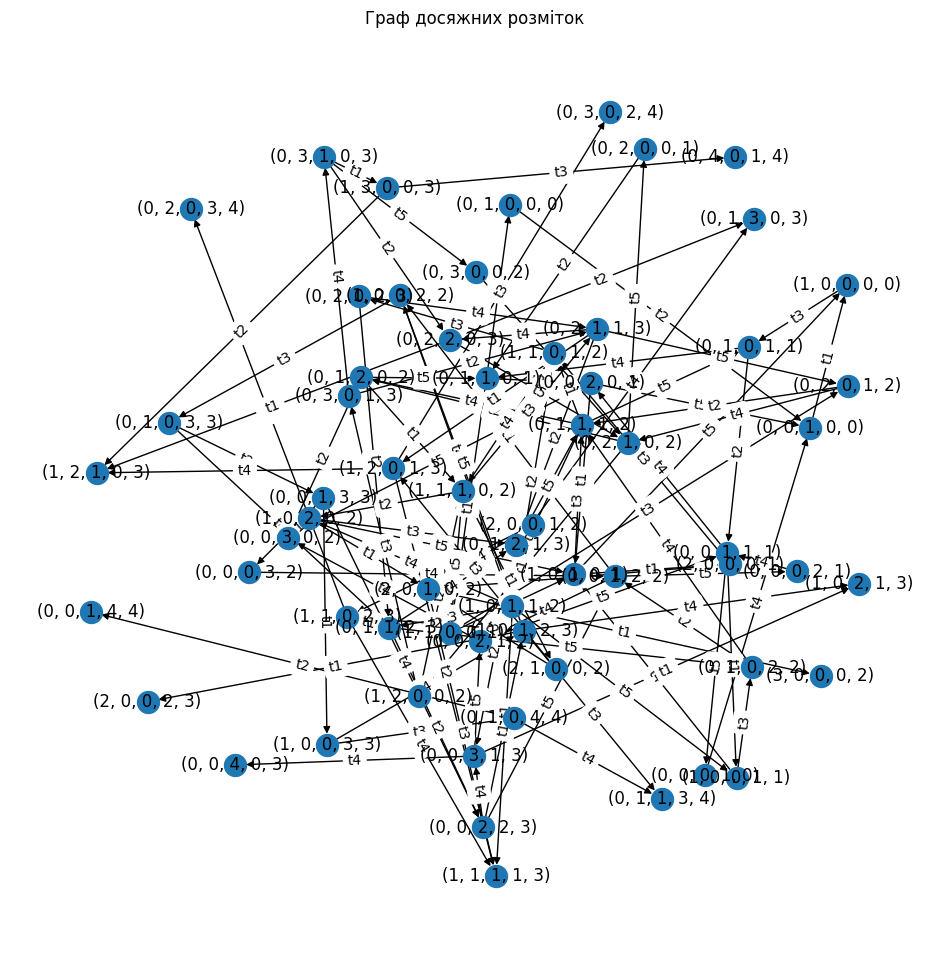

In [2]:
places = ["p1", "p2", "p3", "p4", "p5"]
transitions = ["t1", "t2", "t3", "t4", "t5"]

I = {
    ("p1", "t3"): 1,
    ("p2", "t2"): 1,
    ("p3", "t1"): 1,
    ("p3", "t5"): 1,
    ("p4", "t4"): 1,
    ("p5", "t5"): 1
}

O = {
    ("t1", "p1"): 1,
    ("t2", "p3"): 1,
    ("t3", "p2"): 1,
    ("t3", "p4"): 1,
    ("t3", "p5"): 1,
    ("t4", "p3"): 1
}

M0 = {"p1": 0, "p2": 0, "p3": 1, "p4": 0, "p5": 0}


def enabled(M, t):
    for (p, tr), w in I.items():
        if tr == t and M[p] < w:
            return False
    return True


def fire(M, t):
    M_new = M.copy()
    for (p, tr), w in I.items():
        if tr == t:
            M_new[p] -= w
    for (tr, p), w in O.items():
        if tr == t:
            M_new[p] += w
    return M_new


G = nx.DiGraph()
queue = deque()
visited = set()

def marking_to_tuple(M):
    return tuple(M[p] for p in places)

queue.append(M0)
visited.add(marking_to_tuple(M0))

i = 0
while queue and i < 50:
    i += 1
    M = queue.popleft()
    m_tuple = marking_to_tuple(M)
    G.add_node(m_tuple)

    for t in transitions:
        if enabled(M, t):
            M_next = fire(M, t)
            next_tuple = marking_to_tuple(M_next)
            G.add_edge(m_tuple, next_tuple, label=t)

            if next_tuple not in visited:
                visited.add(next_tuple)
                queue.append(M_next)

_, ax = plt.subplots(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.7)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw(G, pos, ax=ax, with_labels=True, node_size=250)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Граф досяжних розміток")
plt.show()

# Завдання з синтезу МП
Побудувати модель взаємодії трьох процесів, з яких один пише повідомлення в буфер, інші два обробляють повідомлення і поміщають результат у вихідний буфер при обмеженнях на розмір буферів

Змоделювати таку взаємодію можна, наприклад, 3 позиціями та 4 переходами

Позиції:
*   buf_size - розмір буфера
*   buf_in - вхідний буфер
*   buf_out - вихідний буфер

Переходи:
*   produce - покласти повідомлення у вхідний буфер
*   consume1 - обробити повідомлення у буфері (перший процес)
*   consume2 - обробити повідомлення у буфері (другий процес)
*   discard - очистити вихідний буфер

В даному прикладі позиція buf_size виступає у ролі обмеження на розмір буфера. Нові повідомлення неможливо буде записати у вхідний буфер, поки не буде очищений вихідний. Змоделювати це можна наступним переліком переходів

$ I(produce)=\{buf\_size\}; O(produce)=\{buf\_in\}; I(consume1)=\{buf\_in\}; O(consume1)=\{buf\_out\}; I(consume2)=\{buf\_in\}; O(consume2)=\{buf\_out\}; I(discard)=\{buf\_out\}; O(discard)=\{buf\_size\} $

Задамо початкову розмітку, яка визначатиме буфер розміром у 5 повідомлень

$ μ=(5;0;0) $

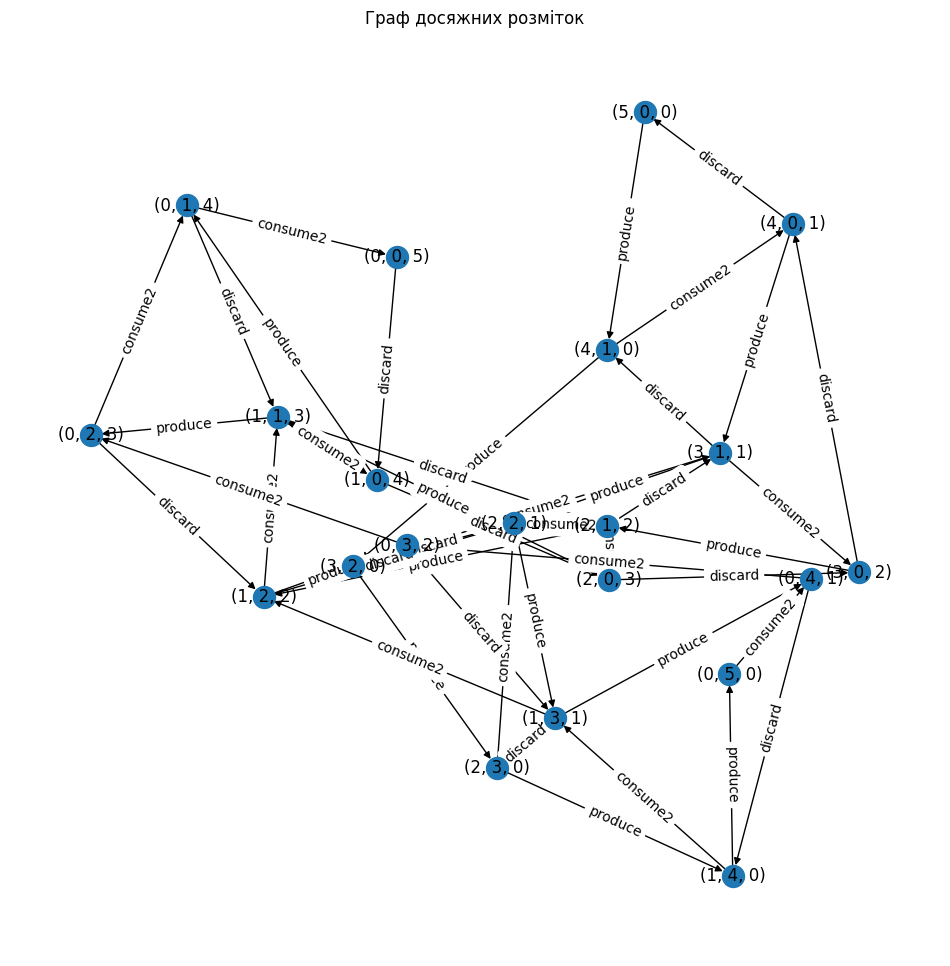

In [3]:
places = ["buf_size", "buf_in", "buf_out"]
transitions = ["produce", "consume1", "consume2", "discard"]

I = {
    ("buf_size", "produce"): 1,
    ("buf_in", "consume1"): 1,
    ("buf_in", "consume2"): 1,
    ("buf_out", "discard"): 1
}

O = {
    ("produce", "buf_in"): 1,
    ("consume1", "buf_out"): 1,
    ("consume2", "buf_out"): 1,
    ("discard", "buf_size"): 1
}

M0 = {"buf_size": 5, "buf_in": 0, "buf_out": 0}

G = nx.DiGraph()
queue = deque()
visited = set()

def marking_to_tuple(M):
    return tuple(M[p] for p in places)

queue.append(M0)
visited.add(marking_to_tuple(M0))

i = 0
while queue and i < 50:
    i += 1
    M = queue.popleft()
    m_tuple = marking_to_tuple(M)
    G.add_node(m_tuple)

    for t in transitions:
        if enabled(M, t):
            M_next = fire(M, t)
            next_tuple = marking_to_tuple(M_next)
            G.add_edge(m_tuple, next_tuple, label=t)

            if next_tuple not in visited:
                visited.add(next_tuple)
                queue.append(M_next)

_, ax = plt.subplots(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.7)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw(G, pos, ax=ax, with_labels=True, node_size=250)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Граф досяжних розміток")
plt.show()